In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

In [40]:
base = pd.read_csv('mcd.csv')

In [41]:
base

,name,serving_size,ingredients,tag,allergy,energy,protein,total_fat,sat_fat,trans_fat,chol,carbs,total_sugar,added_sugar,sodium,description
0,Black Coffee®,200ml,NaN,NaN,No Allergens,6.80,0.00,0.000,0.00,0.00,0.00,1.700,0.00,0.00,0.00,Perfectly brewed for any time of the day.
1,Butter Chicken Grilled Burger,153g,"Premium grilled chicken patty, Shredded onion,...",Dil se makhani burger.,"Cereal containing gluten, Milk, Soya",357.01,17.06,14.410,4.65,0.00,31.93,39.760,6.55,4.71,919.59,Premium grilled chicken patty topped with makh...
2,Butter Paneer Grilled Burger,142g,"Mildly spiced grilled paneer patty, Shredded o...",Dil se makhani burger.,"Cereal containing gluten, Milk, Soya",382.26,12.85,17.150,8.29,0.00,6.62,44.120,8.78,5.08,900.37,Mildly spiced grilled paneer patty topped with...
3,Cheesy Fries,150g,"Salted Fries, Smoky Chipotle Sauce","Hi, it’s cheese on this side!",Milk,453.92,7.19,21.100,10.64,0.59,3.89,41.940,0.95,0.40,430.79,The all-time favourite fries with a generous d...
4,Chicken Maharaja Mac®,296g,"Maharaja bun crown, Haberno sauce, Shredded le...",A royal treat.,"Cereal containing gluten, Milk, Soya",689.12,34.00,36.690,10.33,0.25,81.49,55.390,8.92,6.14,1854.71,\n A double-dec...
5,Chicken McNuggets®,64g,Chicken bites,Each bite is better than the last.,Cereal containing gluten,169.68,10.03,9.544,4.45,0.06,24.66,10.500,0.32,0.00,313.25,"Bite-sized pieces of breaded, boneless chicken..."
6,Chicken McNuggets®,96g,Chicken bites,Each bite is better than the last.,Cereal containing gluten,254.52,15.04,14.300,6.68,0.10,36.99,15.740,0.48,0.00,469.87,"Bite-sized pieces of breaded, boneless chicken..."
7,Chicken McNuggets®,320g,Chicken bites,Each bite is better than the last.,Cereal containing gluten,806.10,47.60,46.900,21.11,0.30,115.00,49.880,1.70,0.00,1490.00,"Bite-sized pieces of breaded, boneless chicken..."
8,Chicken McNuggets®,144g,Chicken bites,Each bite is better than the last.,Cereal containing gluten,381.77,22.56,21.460,10.02,0.14,55.48,23.620,0.72,0.00,704.81,"Bite-sized pieces of breaded, boneless chicken..."
9,Cold Coffee Mcfloat®,270ml,NaN,NaN,Milk,270.05,5.91,7.180,4.89,0.00,15.81,45.440,36.18,19.98,173.59,Rich smooth creamy cold coffee along with swee...


In [42]:
base['serving_size'] = base['serving_size'].str.lstrip(' ')

In [43]:
#Mais vendido

base['name'].value_counts()

Chicken McNuggets®               4
Our World Famous Fries®          3
McFlurry (Choco Crunch)®         2
Masala Chai®                     2
Sundae (Chocolate Brownie)®      2
McFlurry (Oreo)®                 2
Sundae (Chocolate)®              2
Sundae (Strawberry)®             2
Spicy Paneer Wrap®               1
McSpicy Chicken®                 1
Soft Serve Cone®                 1
Pizza McPuff®                    1
Veg Maharaja Mac®                1
McVeggie®                        1
McSwirl Chocolate®               1
McSpicy Paneer®                  1
Spicy Chicken Wrap®              1
Black Coffee®                    1
Butter Chicken Grilled Burger    1
McEgg®                           1
McChicken®                       1
McAloo Tikki Burger®             1
Iced Tea®                        1
Fillet-O-Fish®                   1
Dosa Masala Burger®              1
Cold Coffee®                     1
Cold Coffee Mcfloat®             1
Chicken Maharaja Mac®            1
Cheesy Fries        

In [44]:
#Separando liquido de solido

liquido = []
solido = []
a=0

for i in base['serving_size']:
    if 'ml' in i:
        liquido.append([base['name'][a], base['serving_size'][a],base['carbs'][a]])

        
    if 'g' in i:
        solido.append([base['name'][a],base['serving_size'][a],base['carbs'][a]])
    a+=1
    


In [45]:
liq = pd.DataFrame(liquido)
sol = pd.DataFrame(solido)

In [46]:
liq = liq.rename(columns={0:'Name',1:'Qtd',2:'Carbs'})
sol= sol.rename(columns={0:'Name',1:'Qtd',2:'Carbs'})

In [47]:
liq

,Name,Qtd,Carbs
0,Black Coffee®,200ml,1.70
1,Cold Coffee Mcfloat®,270ml,45.44
2,Cold Coffee®,250ml,40.20
3,Iced Tea®,400ml,59.28
4,Masala Chai®,150ml,18.90
5,Masala Chai®,90ml,11.02


In [48]:
sol.sort_values('Carbs',ascending=False)

,Name,Qtd,Carbs
13,McFlurry (Choco Crunch)®,167.38g,117.780
34,Veg Maharaja Mac®,306g,93.840
27,Spicy Paneer Wrap®,250g,59.278
26,Spicy Chicken Wrap®,257g,57.060
20,McVeggie®,168g,56.540
3,Chicken Maharaja Mac®,296g,55.390
29,Sundae (Chocolate Brownie)®,155.08g,55.240
22,Our World Famous Fries®,154g,54.160
18,McSpicy Paneer®,199g,52.330
8,Dosa Masala Burger®,138g,51.520


In [49]:
base['serving_size'] = base['serving_size'].str.replace('ml','',regex =True).str.replace('g','',regex =True).astype(float)

In [50]:
base['media_carbo'] = base['carbs']/base['serving_size']

In [51]:
base.sort_values('media_carbo',ascending=False)

,name,serving_size,ingredients,tag,allergy,energy,protein,total_fat,sat_fat,trans_fat,chol,carbs,total_sugar,added_sugar,sodium,description,media_carbo
19,McFlurry (Choco Crunch)®,167.38,"Milk fat, Chocolate",Burgers aren't the only things we're good at.,"Milk, Soya",703.17,10.99,19.680,13.80,0.21,11.06,117.780,66.93,54.51,295.89,Milk-based frozen dessert with chocolate crisp...,0.703668
11,Dosa Masala Burger®,138.00,"Whole wheat bun, Rasam mayo, Dosa masala aloo ...",A new taste of India.,"Cereal containing gluten, Milk, Soya",340.23,5.66,12.390,4.22,0.00,0.00,51.520,12.68,6.40,710.54,Turmeric-spiced mashed potato filling topped w...,0.373333
35,Sundae (Chocolate Brownie)®,155.08,"Soft serve mix (100% diary), Hazelnut brownie,...",A global favourite.,"Cereal containing gluten, Milk, Nuts",311.39,4.65,7.460,4.71,0.13,7.78,55.240,27.94,20.28,146.40,An iconic premium dessert option. Can be bough...,0.356203
29,Our World Famous Fries®,109.00,Potato and salt,The legend among legends.,No Allergens,317.92,4.79,14.700,7.04,0.11,1.09,38.340,0.55,0.00,216.79,"The crisp, craveable, fan favourite: our World...",0.351743
27,Our World Famous Fries®,77.00,Potato and salt,The legend among legends.,No Allergens,224.59,3.38,10.390,4.97,0.08,0.77,27.080,0.39,0.00,153.15,"The crisp, craveable, fan favourite: our World...",0.351688
28,Our World Famous Fries®,154.00,Potato and salt,The legend among legends.,No Allergens,449.17,6.76,20.770,9.95,0.15,1.54,54.160,0.77,0.00,306.29,"The crisp, craveable, fan favourite: our World...",0.351688
16,McAloo Tikki Burger®,146.00,"Regular bun crown, Tom-Mayo sauce, Sliced toma...",The one that never goes out of f(l)avour.,"Cereal containing gluten, Milk, Soya",339.52,8.50,11.310,4.27,0.20,1.47,50.270,7.05,4.07,545.34,A golden fried vegetarian patty prepared with ...,0.344315
26,McVeggie®,168.00,"Quarter bun crown, Veg mayonnaise, Shredded le...",Pure taste. Pure veg.,"Cereal containing gluten, Milk, Soya",402.05,10.24,13.830,5.34,0.16,2.49,56.540,7.90,4.49,706.13,"A delectable patty made of green goodness, pot...",0.336548
34,Sundae (Chocolate Brownie)®,110.79,"Soft serve mix (100% diary), Hazelnut brownie,...",A global favourite.,"Cereal containing gluten, Milk, Nuts",205.26,3.20,5.450,3.65,0.10,6.04,35.260,20.75,14.39,100.89,An iconic premium dessert option. Can be bough...,0.318260
2,Butter Paneer Grilled Burger,142.00,"Mildly spiced grilled paneer patty, Shredded o...",Dil se makhani burger.,"Cereal containing gluten, Milk, Soya",382.26,12.85,17.150,8.29,0.00,6.62,44.120,8.78,5.08,900.37,Mildly spiced grilled paneer patty topped with...,0.310704


In [52]:
base['media_energy'] = base['energy']/base['serving_size']

In [53]:
base.sort_values('media_energy',ascending=False)

,name,serving_size,ingredients,tag,allergy,energy,protein,total_fat,sat_fat,trans_fat,chol,carbs,total_sugar,added_sugar,sodium,description,media_carbo,media_energy
19,McFlurry (Choco Crunch)®,167.38,"Milk fat, Chocolate",Burgers aren't the only things we're good at.,"Milk, Soya",703.17,10.99,19.680,13.80,0.21,11.06,117.780,66.93,54.51,295.89,Milk-based frozen dessert with chocolate crisp...,0.703668,4.201040
24,McSpicy Paneer®,199.00,"Quarter pounder bun crown, Shredded lettuce, T...",Let paneer surprise you.,"Cereal containing gluten, Milk, Soya",652.76,20.29,39.450,17.12,0.18,21.85,52.330,8.35,5.27,1074.58,Crispy and spicy paneer patty with creamy tand...,0.262965,3.280201
3,Cheesy Fries,150.00,"Salted Fries, Smoky Chipotle Sauce","Hi, it’s cheese on this side!",Milk,453.92,7.19,21.100,10.64,0.59,3.89,41.940,0.95,0.40,430.79,The all-time favourite fries with a generous d...,0.279600,3.026133
27,Our World Famous Fries®,77.00,Potato and salt,The legend among legends.,No Allergens,224.59,3.38,10.390,4.97,0.08,0.77,27.080,0.39,0.00,153.15,"The crisp, craveable, fan favourite: our World...",0.351688,2.916753
29,Our World Famous Fries®,109.00,Potato and salt,The legend among legends.,No Allergens,317.92,4.79,14.700,7.04,0.11,1.09,38.340,0.55,0.00,216.79,"The crisp, craveable, fan favourite: our World...",0.351743,2.916697
28,Our World Famous Fries®,154.00,Potato and salt,The legend among legends.,No Allergens,449.17,6.76,20.770,9.95,0.15,1.54,54.160,0.77,0.00,306.29,"The crisp, craveable, fan favourite: our World...",0.351688,2.916688
40,Veg Maharaja Mac®,306.00,"Maharaja bun crown, Cocktail sauce, Shredded l...",A feast fit for kings (and queens).,"Cereal containing gluten, Milk, Soya",832.67,24.17,37.940,16.83,0.28,36.19,93.840,11.52,6.92,1529.22,\n A double-dec...,0.306667,2.721144
33,Spicy Paneer Wrap®,250.00,"Whole wheat flat bread, Spicy paneer patty, Ve...",Unwrap deliciousness.,"Cereal containing gluten, Milk, Soya",674.68,20.96,39.100,19.73,0.26,40.93,59.278,3.50,1.08,1087.46,"Tender paneer patty with a fiery, crunchy batt...",0.237112,2.698720
2,Butter Paneer Grilled Burger,142.00,"Mildly spiced grilled paneer patty, Shredded o...",Dil se makhani burger.,"Cereal containing gluten, Milk, Soya",382.26,12.85,17.150,8.29,0.00,6.62,44.120,8.78,5.08,900.37,Mildly spiced grilled paneer patty topped with...,0.310704,2.691972
6,Chicken McNuggets®,96.00,Chicken bites,Each bite is better than the last.,Cereal containing gluten,254.52,15.04,14.300,6.68,0.10,36.99,15.740,0.48,0.00,469.87,"Bite-sized pieces of breaded, boneless chicken...",0.163958,2.651250


In [54]:
base_allergy = copy.deepcopy(base)
base_allergy['allergy'] = base_allergy['allergy'].str.split(',')
base_allergy = base_allergy.explode('allergy')
base_allergy['allergy'] = base_allergy['allergy'].str.lstrip()

In [55]:
base_allergy['allergy'].value_counts()

Milk                        33
Cereal containing gluten    26
Soya                        22
No Allergens                 5
Egg                          4
Sulphites                    2
Nuts                         2
Fish                         1
Name: allergy, dtype: int64

In [56]:
base2 = copy.deepcopy(base)

In [57]:
base2['media_protein'] = base2['protein']/base2['serving_size']
base2.sort_values('media_protein',ascending=False)

,name,serving_size,ingredients,tag,allergy,energy,protein,total_fat,sat_fat,trans_fat,chol,carbs,total_sugar,added_sugar,sodium,description,media_carbo,media_energy,media_protein
5,Chicken McNuggets®,64.00,Chicken bites,Each bite is better than the last.,Cereal containing gluten,169.68,10.03,9.544,4.45,0.06,24.66,10.500,0.32,0.00,313.25,"Bite-sized pieces of breaded, boneless chicken...",0.164062,2.651250,0.156719
6,Chicken McNuggets®,96.00,Chicken bites,Each bite is better than the last.,Cereal containing gluten,254.52,15.04,14.300,6.68,0.10,36.99,15.740,0.48,0.00,469.87,"Bite-sized pieces of breaded, boneless chicken...",0.163958,2.651250,0.156667
8,Chicken McNuggets®,144.00,Chicken bites,Each bite is better than the last.,Cereal containing gluten,381.77,22.56,21.460,10.02,0.14,55.48,23.620,0.72,0.00,704.81,"Bite-sized pieces of breaded, boneless chicken...",0.164028,2.651181,0.156667
7,Chicken McNuggets®,320.00,Chicken bites,Each bite is better than the last.,Cereal containing gluten,806.10,47.60,46.900,21.11,0.30,115.00,49.880,1.70,0.00,1490.00,"Bite-sized pieces of breaded, boneless chicken...",0.155875,2.519062,0.148750
23,McSpicy Chicken®,186.00,"Quarter pounder bun crown, Veg sauce, Shredded...",Hot. In more ways than one.,"Cereal containing gluten, Milk, Egg, Soya",451.92,21.46,19.360,7.63,0.18,66.04,46.080,5.88,4.49,928.52,\n Zesty and re...,0.247742,2.429677,0.115376
4,Chicken Maharaja Mac®,296.00,"Maharaja bun crown, Haberno sauce, Shredded le...",A royal treat.,"Cereal containing gluten, Milk, Soya",689.12,34.00,36.690,10.33,0.25,81.49,55.390,8.92,6.14,1854.71,\n A double-dec...,0.187128,2.328108,0.114865
12,Fillet-O-Fish®,136.00,"Steamed regular bun, Chunky tartar mayo, Fish ...",This one's a great catch.,"Cereal containing gluten, Milk, Egg, Fish, Soya",348.11,15.44,14.160,5.79,0.21,32.83,38.850,5.58,3.54,530.54,Made with Alaskan Pollock sourced from sustain...,0.285662,2.559632,0.113529
1,Butter Chicken Grilled Burger,153.00,"Premium grilled chicken patty, Shredded onion,...",Dil se makhani burger.,"Cereal containing gluten, Milk, Soya",357.01,17.06,14.410,4.65,0.00,31.93,39.760,6.55,4.71,919.59,Premium grilled chicken patty topped with makh...,0.259869,2.333399,0.111503
18,McEgg®,115.00,"Regular bun crown, Mayonnaise, Crisp onion, Eg...",Because eggs are great any time of the day.,"Cereal containing gluten, Milk, Egg, Soya",265.00,12.00,10.000,0.80,0.10,76.88,31.000,5.00,1.60,675.00,\n Made with th...,0.269565,2.304348,0.104348
24,McSpicy Paneer®,199.00,"Quarter pounder bun crown, Shredded lettuce, T...",Let paneer surprise you.,"Cereal containing gluten, Milk, Soya",652.76,20.29,39.450,17.12,0.18,21.85,52.330,8.35,5.27,1074.58,Crispy and spicy paneer patty with creamy tand...,0.262965,3.280201,0.101960


In [58]:
base2['media_total_fat'] = base2['total_fat']/base2['serving_size']
base2.sort_values('media_total_fat',ascending=False)

,name,serving_size,ingredients,tag,allergy,energy,protein,total_fat,sat_fat,trans_fat,chol,carbs,total_sugar,added_sugar,sodium,description,media_carbo,media_energy,media_protein,media_total_fat
24,McSpicy Paneer®,199.00,"Quarter pounder bun crown, Shredded lettuce, T...",Let paneer surprise you.,"Cereal containing gluten, Milk, Soya",652.76,20.29,39.450,17.12,0.18,21.85,52.330,8.35,5.27,1074.58,Crispy and spicy paneer patty with creamy tand...,0.262965,3.280201,0.101960,0.198241
33,Spicy Paneer Wrap®,250.00,"Whole wheat flat bread, Spicy paneer patty, Ve...",Unwrap deliciousness.,"Cereal containing gluten, Milk, Soya",674.68,20.96,39.100,19.73,0.26,40.93,59.278,3.50,1.08,1087.46,"Tender paneer patty with a fiery, crunchy batt...",0.237112,2.698720,0.083840,0.156400
5,Chicken McNuggets®,64.00,Chicken bites,Each bite is better than the last.,Cereal containing gluten,169.68,10.03,9.544,4.45,0.06,24.66,10.500,0.32,0.00,313.25,"Bite-sized pieces of breaded, boneless chicken...",0.164062,2.651250,0.156719,0.149125
8,Chicken McNuggets®,144.00,Chicken bites,Each bite is better than the last.,Cereal containing gluten,381.77,22.56,21.460,10.02,0.14,55.48,23.620,0.72,0.00,704.81,"Bite-sized pieces of breaded, boneless chicken...",0.164028,2.651181,0.156667,0.149028
6,Chicken McNuggets®,96.00,Chicken bites,Each bite is better than the last.,Cereal containing gluten,254.52,15.04,14.300,6.68,0.10,36.99,15.740,0.48,0.00,469.87,"Bite-sized pieces of breaded, boneless chicken...",0.163958,2.651250,0.156667,0.148958
7,Chicken McNuggets®,320.00,Chicken bites,Each bite is better than the last.,Cereal containing gluten,806.10,47.60,46.900,21.11,0.30,115.00,49.880,1.70,0.00,1490.00,"Bite-sized pieces of breaded, boneless chicken...",0.155875,2.519062,0.148750,0.146562
3,Cheesy Fries,150.00,"Salted Fries, Smoky Chipotle Sauce","Hi, it’s cheese on this side!",Milk,453.92,7.19,21.100,10.64,0.59,3.89,41.940,0.95,0.40,430.79,The all-time favourite fries with a generous d...,0.279600,3.026133,0.047933,0.140667
27,Our World Famous Fries®,77.00,Potato and salt,The legend among legends.,No Allergens,224.59,3.38,10.390,4.97,0.08,0.77,27.080,0.39,0.00,153.15,"The crisp, craveable, fan favourite: our World...",0.351688,2.916753,0.043896,0.134935
28,Our World Famous Fries®,154.00,Potato and salt,The legend among legends.,No Allergens,449.17,6.76,20.770,9.95,0.15,1.54,54.160,0.77,0.00,306.29,"The crisp, craveable, fan favourite: our World...",0.351688,2.916688,0.043896,0.134870
29,Our World Famous Fries®,109.00,Potato and salt,The legend among legends.,No Allergens,317.92,4.79,14.700,7.04,0.11,1.09,38.340,0.55,0.00,216.79,"The crisp, craveable, fan favourite: our World...",0.351743,2.916697,0.043945,0.134862


In [59]:
base2['media_sat_fat'] = base2['sat_fat']/base2['serving_size']
base2.sort_values('media_sat_fat',ascending=False)

,name,serving_size,ingredients,tag,allergy,energy,protein,total_fat,sat_fat,trans_fat,...,carbs,total_sugar,added_sugar,sodium,description,media_carbo,media_energy,media_protein,media_total_fat,media_sat_fat
24,McSpicy Paneer®,199.00,"Quarter pounder bun crown, Shredded lettuce, T...",Let paneer surprise you.,"Cereal containing gluten, Milk, Soya",652.76,20.29,39.450,17.12,0.18,...,52.330,8.35,5.27,1074.58,Crispy and spicy paneer patty with creamy tand...,0.262965,3.280201,0.101960,0.198241,0.086030
19,McFlurry (Choco Crunch)®,167.38,"Milk fat, Chocolate",Burgers aren't the only things we're good at.,"Milk, Soya",703.17,10.99,19.680,13.80,0.21,...,117.780,66.93,54.51,295.89,Milk-based frozen dessert with chocolate crisp...,0.703668,4.201040,0.065659,0.117577,0.082447
33,Spicy Paneer Wrap®,250.00,"Whole wheat flat bread, Spicy paneer patty, Ve...",Unwrap deliciousness.,"Cereal containing gluten, Milk, Soya",674.68,20.96,39.100,19.73,0.26,...,59.278,3.50,1.08,1087.46,"Tender paneer patty with a fiery, crunchy batt...",0.237112,2.698720,0.083840,0.156400,0.078920
3,Cheesy Fries,150.00,"Salted Fries, Smoky Chipotle Sauce","Hi, it’s cheese on this side!",Milk,453.92,7.19,21.100,10.64,0.59,...,41.940,0.95,0.40,430.79,The all-time favourite fries with a generous d...,0.279600,3.026133,0.047933,0.140667,0.070933
6,Chicken McNuggets®,96.00,Chicken bites,Each bite is better than the last.,Cereal containing gluten,254.52,15.04,14.300,6.68,0.10,...,15.740,0.48,0.00,469.87,"Bite-sized pieces of breaded, boneless chicken...",0.163958,2.651250,0.156667,0.148958,0.069583
8,Chicken McNuggets®,144.00,Chicken bites,Each bite is better than the last.,Cereal containing gluten,381.77,22.56,21.460,10.02,0.14,...,23.620,0.72,0.00,704.81,"Bite-sized pieces of breaded, boneless chicken...",0.164028,2.651181,0.156667,0.149028,0.069583
5,Chicken McNuggets®,64.00,Chicken bites,Each bite is better than the last.,Cereal containing gluten,169.68,10.03,9.544,4.45,0.06,...,10.500,0.32,0.00,313.25,"Bite-sized pieces of breaded, boneless chicken...",0.164062,2.651250,0.156719,0.149125,0.069531
7,Chicken McNuggets®,320.00,Chicken bites,Each bite is better than the last.,Cereal containing gluten,806.10,47.60,46.900,21.11,0.30,...,49.880,1.70,0.00,1490.00,"Bite-sized pieces of breaded, boneless chicken...",0.155875,2.519062,0.148750,0.146562,0.065969
30,Pizza McPuff®,87.00,"Assorted vegetables, Refined wheat flour, Pizz...",Something different. Something delicious.,"Cereal containing gluten, Milk, Soya",228.21,5.45,11.440,5.72,0.09,...,24.790,2.73,0.35,390.74,"A blend of assorted vegetables (carrot, beans,...",0.284943,2.623103,0.062644,0.131494,0.065747
28,Our World Famous Fries®,154.00,Potato and salt,The legend among legends.,No Allergens,449.17,6.76,20.770,9.95,0.15,...,54.160,0.77,0.00,306.29,"The crisp, craveable, fan favourite: our World...",0.351688,2.916688,0.043896,0.134870,0.064610


In [60]:
base2['media_trans_fat'] = base2['trans_fat']/base2['serving_size']
base2.sort_values('media_trans_fat',ascending=False)

,name,serving_size,ingredients,tag,allergy,energy,protein,total_fat,sat_fat,trans_fat,...,total_sugar,added_sugar,sodium,description,media_carbo,media_energy,media_protein,media_total_fat,media_sat_fat,media_trans_fat
3,Cheesy Fries,150.00,"Salted Fries, Smoky Chipotle Sauce","Hi, it’s cheese on this side!",Milk,453.92,7.19,21.100,10.64,0.59,...,0.95,0.40,430.79,The all-time favourite fries with a generous d...,0.279600,3.026133,0.047933,0.140667,0.070933,0.003933
12,Fillet-O-Fish®,136.00,"Steamed regular bun, Chunky tartar mayo, Fish ...",This one's a great catch.,"Cereal containing gluten, Milk, Egg, Fish, Soya",348.11,15.44,14.160,5.79,0.21,...,5.58,3.54,530.54,Made with Alaskan Pollock sourced from sustain...,0.285662,2.559632,0.113529,0.104118,0.042574,0.001544
16,McAloo Tikki Burger®,146.00,"Regular bun crown, Tom-Mayo sauce, Sliced toma...",The one that never goes out of f(l)avour.,"Cereal containing gluten, Milk, Soya",339.52,8.50,11.310,4.27,0.20,...,7.05,4.07,545.34,A golden fried vegetarian patty prepared with ...,0.344315,2.325479,0.058219,0.077466,0.029247,0.001370
19,McFlurry (Choco Crunch)®,167.38,"Milk fat, Chocolate",Burgers aren't the only things we're good at.,"Milk, Soya",703.17,10.99,19.680,13.80,0.21,...,66.93,54.51,295.89,Milk-based frozen dessert with chocolate crisp...,0.703668,4.201040,0.065659,0.117577,0.082447,0.001255
41,Veg Surprise Burger,132.00,"Regular Bun, Italian mayo, Shredded onion, Her...",A surprise that will leave you wide-eyed.,"Cereal containing gluten, Milk, Soya",313.44,5.71,14.950,3.73,0.14,...,5.66,1.64,504.19,A scrumptious potato patty topped with a delec...,0.301818,2.374545,0.043258,0.113258,0.028258,0.001061
32,Spicy Chicken Wrap®,257.00,"Whole wheat flat bread, Spicy chicken patty, V...","Familiar, yet different.","Cereal containing gluten, Milk, Egg, Soya",567.19,23.74,26.890,12.54,0.27,...,2.52,1.08,1152.38,Juicy chicken coated with hot and crispy batte...,0.222023,2.206965,0.092374,0.104630,0.048794,0.001051
6,Chicken McNuggets®,96.00,Chicken bites,Each bite is better than the last.,Cereal containing gluten,254.52,15.04,14.300,6.68,0.10,...,0.48,0.00,469.87,"Bite-sized pieces of breaded, boneless chicken...",0.163958,2.651250,0.156667,0.148958,0.069583,0.001042
33,Spicy Paneer Wrap®,250.00,"Whole wheat flat bread, Spicy paneer patty, Ve...",Unwrap deliciousness.,"Cereal containing gluten, Milk, Soya",674.68,20.96,39.100,19.73,0.26,...,3.50,1.08,1087.46,"Tender paneer patty with a fiery, crunchy batt...",0.237112,2.698720,0.083840,0.156400,0.078920,0.001040
27,Our World Famous Fries®,77.00,Potato and salt,The legend among legends.,No Allergens,224.59,3.38,10.390,4.97,0.08,...,0.39,0.00,153.15,"The crisp, craveable, fan favourite: our World...",0.351688,2.916753,0.043896,0.134935,0.064545,0.001039
30,Pizza McPuff®,87.00,"Assorted vegetables, Refined wheat flour, Pizz...",Something different. Something delicious.,"Cereal containing gluten, Milk, Soya",228.21,5.45,11.440,5.72,0.09,...,2.73,0.35,390.74,"A blend of assorted vegetables (carrot, beans,...",0.284943,2.623103,0.062644,0.131494,0.065747,0.001034


In [61]:
base2['media_chol'] = base2['chol']/base2['serving_size']
base2.sort_values('media_chol',ascending=False)

,name,serving_size,ingredients,tag,allergy,energy,protein,total_fat,sat_fat,trans_fat,...,added_sugar,sodium,description,media_carbo,media_energy,media_protein,media_total_fat,media_sat_fat,media_trans_fat,media_chol
18,McEgg®,115.00,"Regular bun crown, Mayonnaise, Crisp onion, Eg...",Because eggs are great any time of the day.,"Cereal containing gluten, Milk, Egg, Soya",265.00,12.00,10.000,0.80,0.10,...,1.60,675.00,\n Made with th...,0.269565,2.304348,0.104348,0.086957,0.006957,0.000870,0.668522
5,Chicken McNuggets®,64.00,Chicken bites,Each bite is better than the last.,Cereal containing gluten,169.68,10.03,9.544,4.45,0.06,...,0.00,313.25,"Bite-sized pieces of breaded, boneless chicken...",0.164062,2.651250,0.156719,0.149125,0.069531,0.000937,0.385313
6,Chicken McNuggets®,96.00,Chicken bites,Each bite is better than the last.,Cereal containing gluten,254.52,15.04,14.300,6.68,0.10,...,0.00,469.87,"Bite-sized pieces of breaded, boneless chicken...",0.163958,2.651250,0.156667,0.148958,0.069583,0.001042,0.385313
8,Chicken McNuggets®,144.00,Chicken bites,Each bite is better than the last.,Cereal containing gluten,381.77,22.56,21.460,10.02,0.14,...,0.00,704.81,"Bite-sized pieces of breaded, boneless chicken...",0.164028,2.651181,0.156667,0.149028,0.069583,0.000972,0.385278
7,Chicken McNuggets®,320.00,Chicken bites,Each bite is better than the last.,Cereal containing gluten,806.10,47.60,46.900,21.11,0.30,...,0.00,1490.00,"Bite-sized pieces of breaded, boneless chicken...",0.155875,2.519062,0.148750,0.146562,0.065969,0.000937,0.359375
23,McSpicy Chicken®,186.00,"Quarter pounder bun crown, Veg sauce, Shredded...",Hot. In more ways than one.,"Cereal containing gluten, Milk, Egg, Soya",451.92,21.46,19.360,7.63,0.18,...,4.49,928.52,\n Zesty and re...,0.247742,2.429677,0.115376,0.104086,0.041022,0.000968,0.355054
32,Spicy Chicken Wrap®,257.00,"Whole wheat flat bread, Spicy chicken patty, V...","Familiar, yet different.","Cereal containing gluten, Milk, Egg, Soya",567.19,23.74,26.890,12.54,0.27,...,1.08,1152.38,Juicy chicken coated with hot and crispy batte...,0.222023,2.206965,0.092374,0.104630,0.048794,0.001051,0.340973
4,Chicken Maharaja Mac®,296.00,"Maharaja bun crown, Haberno sauce, Shredded le...",A royal treat.,"Cereal containing gluten, Milk, Soya",689.12,34.00,36.690,10.33,0.25,...,6.14,1854.71,\n A double-dec...,0.187128,2.328108,0.114865,0.123953,0.034899,0.000845,0.275304
12,Fillet-O-Fish®,136.00,"Steamed regular bun, Chunky tartar mayo, Fish ...",This one's a great catch.,"Cereal containing gluten, Milk, Egg, Fish, Soya",348.11,15.44,14.160,5.79,0.21,...,3.54,530.54,Made with Alaskan Pollock sourced from sustain...,0.285662,2.559632,0.113529,0.104118,0.042574,0.001544,0.241397
1,Butter Chicken Grilled Burger,153.00,"Premium grilled chicken patty, Shredded onion,...",Dil se makhani burger.,"Cereal containing gluten, Milk, Soya",357.01,17.06,14.410,4.65,0.00,...,4.71,919.59,Premium grilled chicken patty topped with makh...,0.259869,2.333399,0.111503,0.094183,0.030392,0.000000,0.208693


In [62]:
base2['media_sodium'] = base2['sodium']/base2['serving_size']
base2.sort_values('media_sodium',ascending=False)

,name,serving_size,ingredients,tag,allergy,energy,protein,total_fat,sat_fat,trans_fat,...,sodium,description,media_carbo,media_energy,media_protein,media_total_fat,media_sat_fat,media_trans_fat,media_chol,media_sodium
2,Butter Paneer Grilled Burger,142.00,"Mildly spiced grilled paneer patty, Shredded o...",Dil se makhani burger.,"Cereal containing gluten, Milk, Soya",382.26,12.85,17.150,8.29,0.00,...,900.37,Mildly spiced grilled paneer patty topped with...,0.310704,2.691972,0.090493,0.120775,0.058380,0.000000,0.046620,6.340634
4,Chicken Maharaja Mac®,296.00,"Maharaja bun crown, Haberno sauce, Shredded le...",A royal treat.,"Cereal containing gluten, Milk, Soya",689.12,34.00,36.690,10.33,0.25,...,1854.71,\n A double-dec...,0.187128,2.328108,0.114865,0.123953,0.034899,0.000845,0.275304,6.265912
1,Butter Chicken Grilled Burger,153.00,"Premium grilled chicken patty, Shredded onion,...",Dil se makhani burger.,"Cereal containing gluten, Milk, Soya",357.01,17.06,14.410,4.65,0.00,...,919.59,Premium grilled chicken patty topped with makh...,0.259869,2.333399,0.111503,0.094183,0.030392,0.000000,0.208693,6.010392
18,McEgg®,115.00,"Regular bun crown, Mayonnaise, Crisp onion, Eg...",Because eggs are great any time of the day.,"Cereal containing gluten, Milk, Egg, Soya",265.00,12.00,10.000,0.80,0.10,...,675.00,\n Made with th...,0.269565,2.304348,0.104348,0.086957,0.006957,0.000870,0.668522,5.869565
24,McSpicy Paneer®,199.00,"Quarter pounder bun crown, Shredded lettuce, T...",Let paneer surprise you.,"Cereal containing gluten, Milk, Soya",652.76,20.29,39.450,17.12,0.18,...,1074.58,Crispy and spicy paneer patty with creamy tand...,0.262965,3.280201,0.101960,0.198241,0.086030,0.000905,0.109799,5.399899
11,Dosa Masala Burger®,138.00,"Whole wheat bun, Rasam mayo, Dosa masala aloo ...",A new taste of India.,"Cereal containing gluten, Milk, Soya",340.23,5.66,12.390,4.22,0.00,...,710.54,Turmeric-spiced mashed potato filling topped w...,0.373333,2.465435,0.041014,0.089783,0.030580,0.000000,0.000000,5.148841
40,Veg Maharaja Mac®,306.00,"Maharaja bun crown, Cocktail sauce, Shredded l...",A feast fit for kings (and queens).,"Cereal containing gluten, Milk, Soya",832.67,24.17,37.940,16.83,0.28,...,1529.22,\n A double-dec...,0.306667,2.721144,0.078987,0.123987,0.055000,0.000915,0.118268,4.997451
23,McSpicy Chicken®,186.00,"Quarter pounder bun crown, Veg sauce, Shredded...",Hot. In more ways than one.,"Cereal containing gluten, Milk, Egg, Soya",451.92,21.46,19.360,7.63,0.18,...,928.52,\n Zesty and re...,0.247742,2.429677,0.115376,0.104086,0.041022,0.000968,0.355054,4.992043
5,Chicken McNuggets®,64.00,Chicken bites,Each bite is better than the last.,Cereal containing gluten,169.68,10.03,9.544,4.45,0.06,...,313.25,"Bite-sized pieces of breaded, boneless chicken...",0.164062,2.651250,0.156719,0.149125,0.069531,0.000937,0.385313,4.894531
8,Chicken McNuggets®,144.00,Chicken bites,Each bite is better than the last.,Cereal containing gluten,381.77,22.56,21.460,10.02,0.14,...,704.81,"Bite-sized pieces of breaded, boneless chicken...",0.164028,2.651181,0.156667,0.149028,0.069583,0.000972,0.385278,4.894514


In [63]:
base = base.assign(qtd_product = 1)

In [64]:
aux = base.groupby('name').agg({'carbs': 'mean', 'qtd_product': 'sum'}).sort_values('qtd_product', ascending=False).head(10)


In [65]:
aux = aux.astype(int)

In [66]:
aux

,carbs,qtd_product
name,,
Chicken McNuggets®,24,4
Our World Famous Fries®,39,3
McFlurry (Choco Crunch)®,70,2
Masala Chai®,14,2
Sundae (Chocolate Brownie)®,45,2
McFlurry (Oreo)®,26,2
Sundae (Chocolate)®,24,2
Sundae (Strawberry)®,25,2
Spicy Paneer Wrap®,59,1


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# Plotando grafico de carboidratos por produto

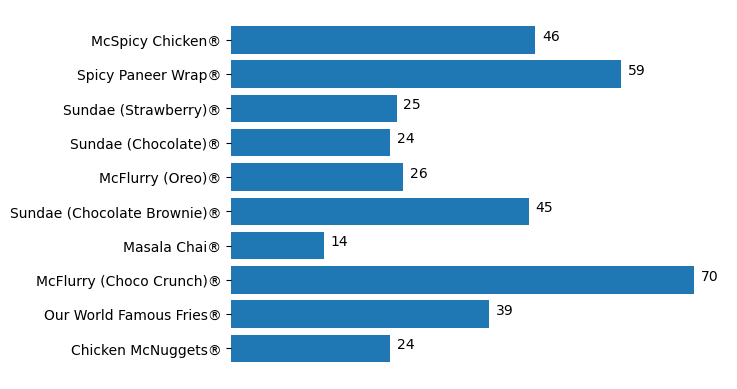

In [69]:
x = aux.index
y = aux['carbs'].values

fig, ax = plt.subplots()

ax.barh(x,y)
ax.tick_params('x',labelrotation = 90)
ax.set_xlabel('Carboidrados por quantidade')
ax.xaxis.set_visible(False)
ax.set_xlim(0,max(y)+5)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

for i in range(len(aux)):
    plt.annotate(y[i],(y[i]+1,x[i]))


plt.show()

In [72]:
base = base.groupby('name').agg({'serving_size':'mean','energy':'mean','protein':'mean','total_fat':'mean',
                                'sat_fat':'mean','trans_fat':'mean','chol':'mean','carbs':'mean',
                                'total_sugar':'mean','added_sugar':'mean','sodium':'mean','qtd_product':'sum'})
base

,serving_size,energy,protein,total_fat,sat_fat,trans_fat,chol,carbs,total_sugar,added_sugar,sodium,qtd_product
name,,,,,,,,,,,,
Black Coffee®,200.000000,6.8000,0.000000,0.000000,0.000,0.000000,0.000000,1.700,0.000,0.000,0.0000,1
Butter Chicken Grilled Burger,153.000000,357.0100,17.060000,14.410000,4.650,0.000000,31.930000,39.760,6.550,4.710,919.5900,1
Butter Paneer Grilled Burger,142.000000,382.2600,12.850000,17.150000,8.290,0.000000,6.620000,44.120,8.780,5.080,900.3700,1
Cheesy Fries,150.000000,453.9200,7.190000,21.100000,10.640,0.590000,3.890000,41.940,0.950,0.400,430.7900,1
Chicken Maharaja Mac®,296.000000,689.1200,34.000000,36.690000,10.330,0.250000,81.490000,55.390,8.920,6.140,1854.7100,1
Chicken McNuggets®,156.000000,403.0175,23.807500,23.051000,10.565,0.150000,58.032500,24.935,0.805,0.000,744.4825,4
Cold Coffee Mcfloat®,270.000000,270.0500,5.910000,7.180000,4.890,0.000000,15.810000,45.440,36.180,19.980,173.5900,1
Cold Coffee®,250.000000,301.1000,9.750000,11.150000,7.450,0.000000,27.400000,40.200,37.500,21.250,175.0000,1
Dosa Masala Burger®,138.000000,340.2300,5.660000,12.390000,4.220,0.000000,0.000000,51.520,12.680,6.400,710.5400,1


<AxesSubplot:>

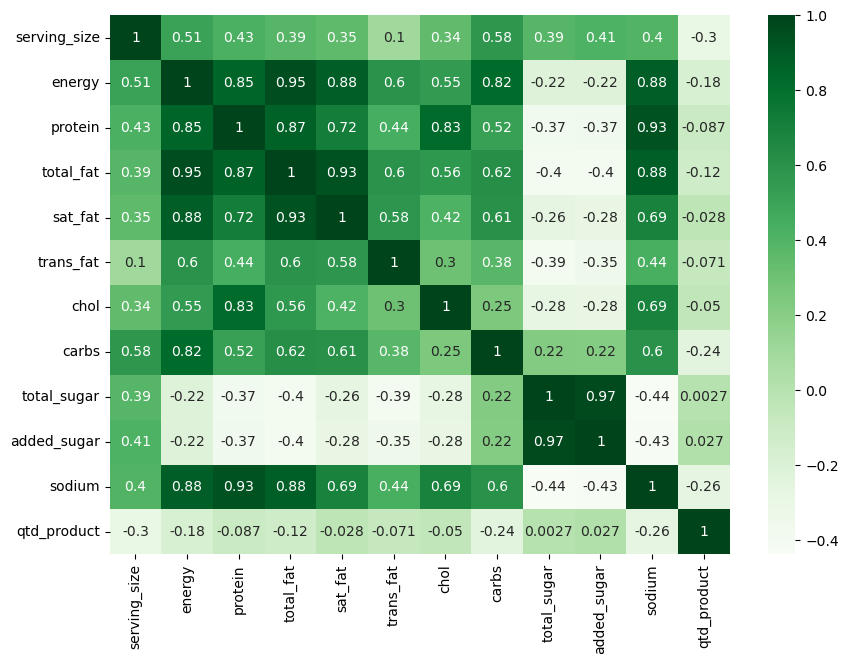

In [73]:
plt.figure(figsize=(10,7))
sns.heatmap(base.corr(), annot=True, cmap='Greens')

In [107]:
base['energy'] = base['energy'].astype(int)
base['carbs'] = base['carbs'].astype(int)
base= base.sort_values('carbs')

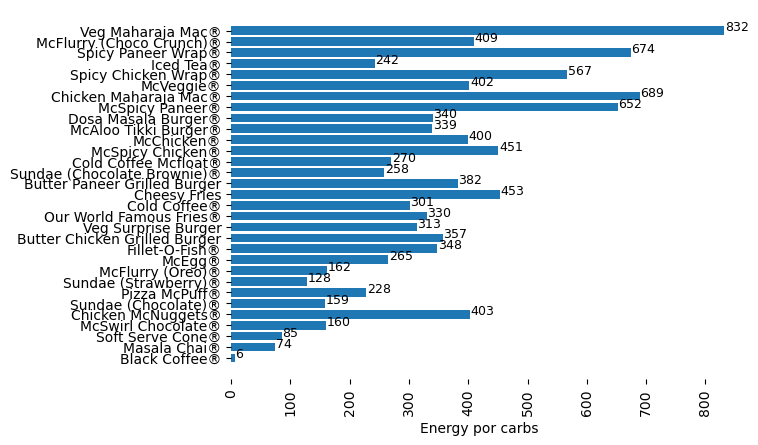

In [108]:
#Grafico ordenado por qtd de carbs, mostrando a correlação com a energy

x = base.index
y = base['energy'].values

fig, ax = plt.subplots()

ax.barh(x,y)
ax.tick_params('x',labelrotation = 90)
ax.set_xlabel('Energy por carbs')
ax.xaxis.set_visible(True)
ax.set_xlim(0,max(y)+5)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

for i in range(len(base['energy'])):
    plt.annotate(f'{y[i]}',(y[i]+1,x[i]),fontsize =9)



plt.show()

In [ ]:
# o produto mais vendido foi: Chicken McNuggets®
# o produto com maior carbo / qtd é: McFlurry (Choco Crunch)®
# o produto com maior valor de energy por qtd é: McFlurry (Choco Crunch)®
# o produto com maior valor de protein por qtd é: Chicken McNuggets®
# o produto com maior valor de total_fat por qtd é: McSpicy Paneer®
# o produto com maior valor de sat_fat por qtd é: McSpicy Paneer®
# o produto com maior valor de trans_fat por qtd é: Cheesy Fries
# o produto com maior valor de colesterol por qtd é: McEgg®
# o produto com maior valor de sodio por qtd é: Butter Paneer Grilled Burger
# o ingrediente alergico mais comum é o: Milk

# Analise o grafico de calor podemos ver que Energy, Protein, Total fat, Sat fat e Sodium está diretamente ligados,
# podemos concluir que o tamanho da porção não é tão relevante neste topico, se queremos energia temos que ir atrás
# destes produtos com estes valores, o carbo tambem pode entrar para energia por ter alta correlação.

